# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

**1)**

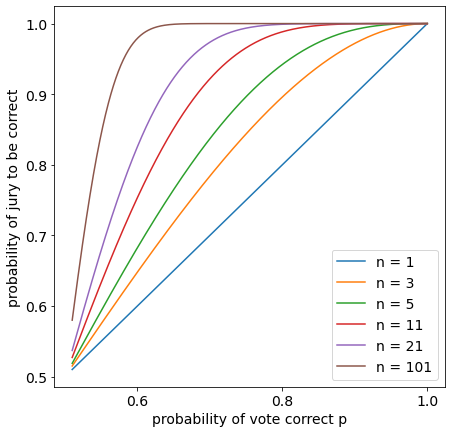

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def condorcet_jury_theorem(n, p):
  correct_decisions = 0
  for i in range(math.ceil(n/2), n+1):
    correct_decisions += math.comb(n, i) * math.pow(p,i) * math.pow(1-p,n-i) #according to the formula
  return correct_decisions

plt.figure(figsize=(7, 7))
probability = np.linspace(0.51, 1, 1000)
for n in [1, 3, 5, 11, 21, 101]:
  jury_correct = []
  for p in probability:
    jury_correct.append(condorcet_jury_theorem(n, p))
  plt.plot(probability, jury_correct, label=f"n = {n}")

plt.legend()
plt.xlabel('probability of vote correct p')
plt.ylabel('probability of jury to be correct')
plt.rcParams.update({'font.size': 22})
plt.show()

**2)**
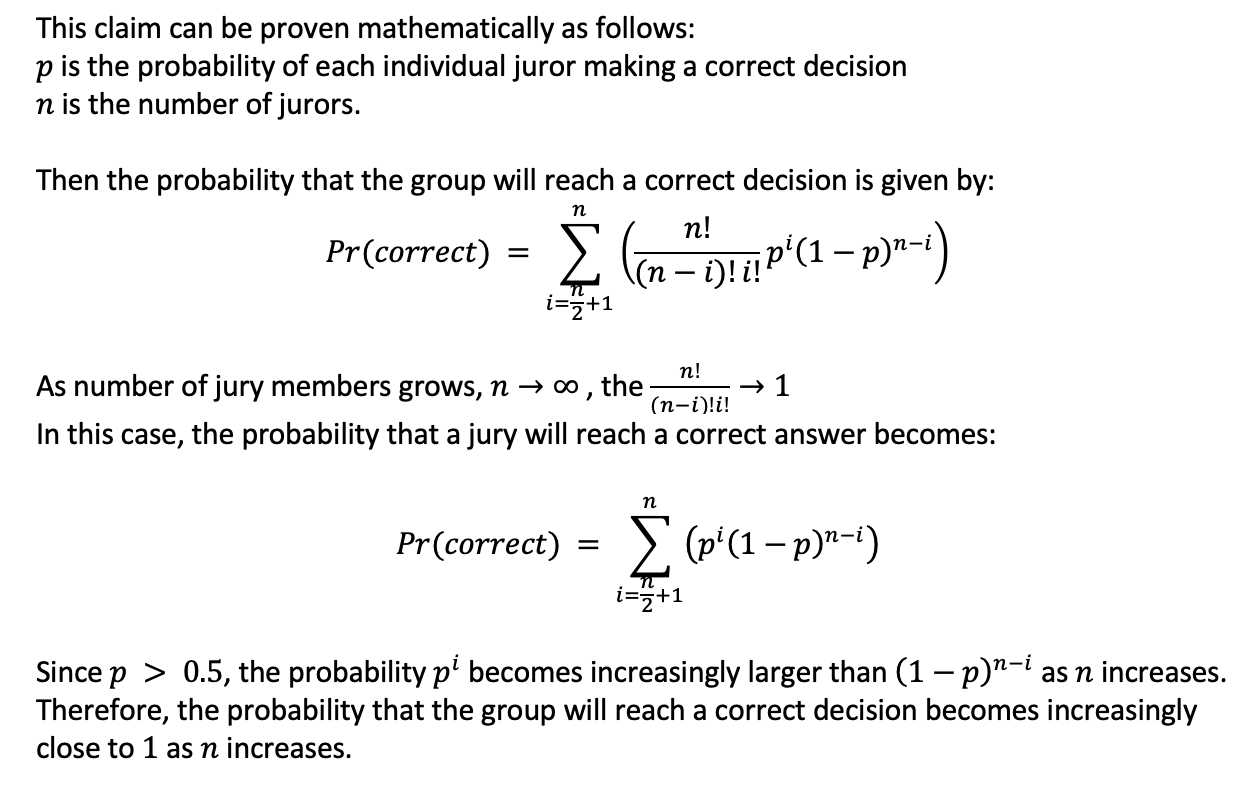

# II. AdaBoost (35 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:**
 * Explain you results in text and support it with figures.

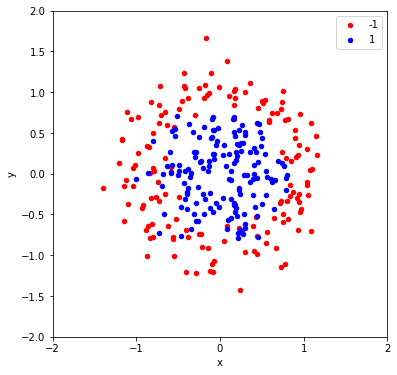

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.rcParams.update({'font.size': 14})
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out

    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1',
                 alpha=0.5, label=key, color=colors[key])

    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
    plt.rcParams.update({'font.size': 14})##

    ax.axis('scaled')

#### Answer


Split the sample set into 2/3rd train set and 1/3 test set:

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

AdaBoostClassifier model by using n weak learners, for the base weak learners, we use a linear SVM classifier:

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

def adaboost_n(X_train, X_test, y_train, y_test, n):
  abc = AdaBoostClassifier(n_estimators=n,
                          learning_rate=1,
                          algorithm='SAMME',
                          base_estimator=LinearSVC(tol=1e-5,loss='hinge', C=1e5, max_iter=1e6))
  model = abc.fit(X_train, y_train)
  return model

Train ensemble classifiers where each has a different number of estimators  𝑛∈1,3,10,50,100,1000,10000, and calculate the accuracy and the estimatoe error.

In [ ]:
for n in [1,3,10,50,100,1000,10000]:
  model = adaboost_n(X_train, X_test, y_train, y_test, n)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  mean_error = round(np.mean(model.estimator_errors_),2)
  print("By using {} weak learners: \n The accuracy is {} \n The estimator errors is {}".format(n, accuracy, mean_error))

By using 1 weak learners: 
 The accuracy is 0.52 
 The estimator errors is 0.36
By using 3 weak learners: 
 The accuracy is 0.52 
 The estimator errors is 0.42
By using 10 weak learners: 
 The accuracy is 0.63 
 The estimator errors is 0.45
By using 50 weak learners: 
 The accuracy is 0.75 
 The estimator errors is 0.48
By using 100 weak learners: 
 The accuracy is 0.75 
 The estimator errors is 0.74
By using 1000 weak learners: 
 The accuracy is 0.75 
 The estimator errors is 0.97
By using 10000 weak learners: 
 The accuracy is 0.75 
 The estimator errors is 1.0


Using the given function plot_data to plot the final decision plane of each ensemble model.

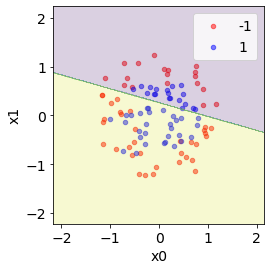

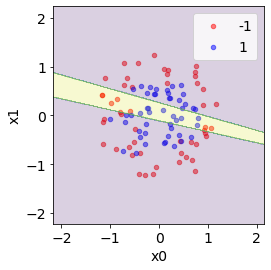

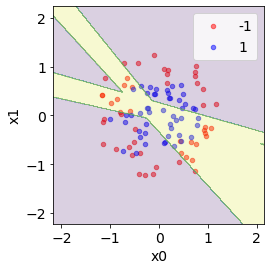

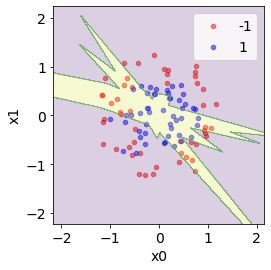

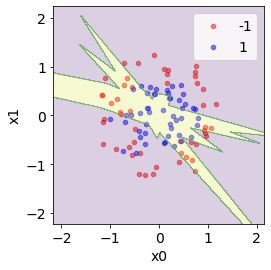

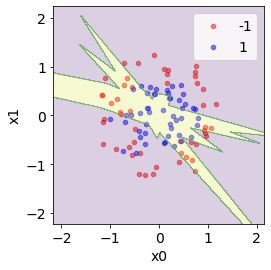

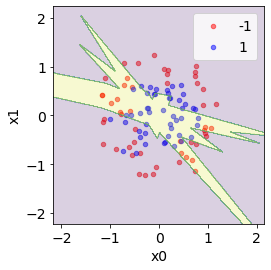

In [ ]:
for n in [1,3,10,50,100,1000,10000]:
  model = adaboost_n(X_train, X_test, y_train, y_test, n)
  fig, ax = plt.subplots(1, 1)
  plot_data(X_test, y_test, lambda x : model.predict(x), ax)

**1)**  It can be seen that when we used a small number of weak learners then there was a substantial change in the accuracy of the model, but from a certain number of weak learners (n=50) there was no longer a change.

**2)** for check if our model start to overfit at some point, we can calculate the training accuracy and the validation accuracy and if the model is performing well on the training set but poorly on the validation set, it may be overfitting to the training data.
This is because it has learned patterns in the training data that don't generalize to unseen data.

In [ ]:
from matplotlib import pyplot

def check_overfiting(X_train, X_test, y_train, y_test, n):
  abc = AdaBoostClassifier(n_estimators=n,
                          learning_rate=1,
                          algorithm='SAMME',
                          base_estimator=LinearSVC(tol=1e-5,loss='hinge', C=1e5, max_iter=1e6))
  model = abc.fit(X_train, y_train)
  train_scores, test_scores = list(), list()
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train, train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test, test_yhat)
  test_scores.append(test_acc)
  train_acc = round(train_acc,2)
  test_acc = round(test_acc,2)

  print('for {} weak learners, train accuracy: {}, test accuracy: {}'.format(n, train_acc, test_acc))
  return [train_acc, test_acc]


for 1 weak learners, train accuracy: 0.56, test accuracy: 0.58
for 3 weak learners, train accuracy: 0.58, test accuracy: 0.64
for 10 weak learners, train accuracy: 0.6, test accuracy: 0.64
for 50 weak learners, train accuracy: 0.82, test accuracy: 0.72
for 100 weak learners, train accuracy: 0.82, test accuracy: 0.72
for 1000 weak learners, train accuracy: 0.82, test accuracy: 0.72
for 10000 weak learners, train accuracy: 0.82, test accuracy: 0.72


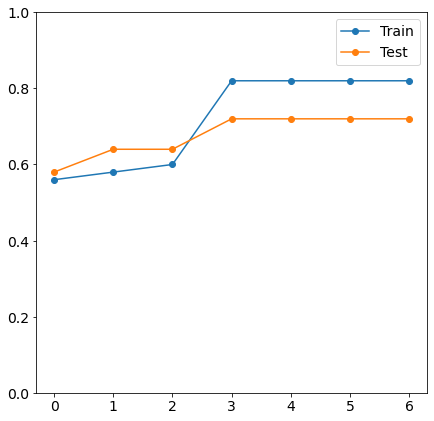

In [ ]:
train_scores = []
test_scores = []
N = [1,3,10,50,100,1000,10000]

for n in N:
  result = check_overfiting(X_train, X_test, y_train, y_test, n)
  train_scores.append(result[0])
  test_scores.append(result[1])

#plot of train and test scores
pyplot.figure(figsize=(7, 7))
pyplot.plot(train_scores, '-o', label='Train')
pyplot.plot(test_scores, '-o', label='Test')
pyplot.legend()
pyplot.ylim([0, 1])
plt.rcParams.update({'font.size': 14})
pyplot.show()


It can be seen that for n = 1, 3, 10 the accuracy of the model in the training set is equal and even less than the accuracy of the model in the test set, but for n = 50,100, 1000, 10000 the accuracy in the training set is higher than the accuracy in the test set but the difference is not very significant in order to indicate overfit.

**3)** estimator_errors_ is calculated the classification error for each estimator in the boosted ensembl. We want the errors of the individual estimators to be as low as possible, therefore after we calculated the average of estimator_errors_, we chose in the model that use 1 weak learners which have the low estimator errors.

---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (50 pts + 10 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten additional points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef





In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle competitions download -c mirna-cross-species-prediction

# extract the files
!unzip '/content/mirna-cross-species-prediction.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
 68% 29.0M/42.6M [00:00<00:00, 123MB/s] 
100% 42.6M/42.6M [00:00<00:00, 123MB/s]
Archive:  /content/mirna-cross-species-prediction.zip
  inflating: sub.csv                 
  inflating: x_test.csv              
  inflating: x_train.csv             
  inflating: y_train.csv             


In [ ]:
import pandas as pd
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')

### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions.

***Write your code below***


First, we will check how many Null values we have in the training data

In [ ]:
x_train.isna().sum()

id                                          0
Acc_P10_10th                             2736
Acc_P10_1th                              2736
Acc_P10_2th                              2711
Acc_P10_3th                              2735
                                         ... 
miRNAPairingCount_X3p_bulge_nt           2719
miRNAPairingCount_X3p_bulge_target_nt    2723
miRNAPairingCount_X3p_mir_bulge          2754
miRNAPairingCount_X3p_mismatch           2704
miRNAPairingCount_X3p_target_bulge       2682
Length: 593, dtype: int64

In [ ]:
y_train.isna().sum()

id          0
label    2692
dtype: int64

**Conclusion:** becuase we have a lot of null values we decided for first model to use only the data without the null values and then use the model to predict the labels for the null values in the train data.

Next, we want to see the statistics of the labels in the training set.

[Text(0.5, 1.0, 'Number of Instances of Each Label')]

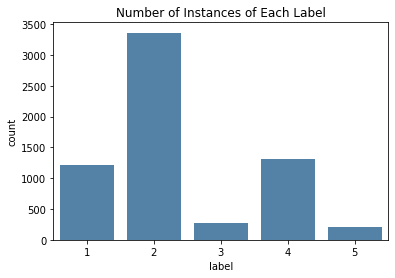

In [ ]:
import seaborn as sns
order = [1, 2, 3, 4, 5]
sns.countplot(x = "label", data = y_train, order = order, color='steelblue').set(title='Number of Instances of Each Label')

In [ ]:
count_label = y_train["label"].value_counts().sort_index()
sum = count_label.sum()
for label, count in enumerate(count_label):
  res = count / sum
  print("The probability of label {} is {}".format(label, res))

The probability of label 0 is 0.19016187333019016
The probability of label 1 is 0.5282099638535283
The probability of label 2 is 0.041804180418041806
The probability of label 3 is 0.2072921577872073
The probability of label 4 is 0.03253182461103253


**Conclusion:** we can see that label 2 is half of the data, therefore we can understand that it might cause to irreducible error.

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it.

***Write your code below***


First, for handing missing values:
- columns with values of type string and boolean we chose to replaced the null values with the most common value of the column
- columns with values of type float we chose to check if the most common value is found at least in 60 precent of the column we replaced the null values with the most common value of the column, otherwise we calculated the mean value of the column and used it to replace the missing values.

In [ ]:
def fill_null_value(df):
  for col in df.columns:
    most_commom = df[col].value_counts().head(1)
    if isinstance(most_commom.index[0], str):
      df[col].fillna(most_commom.index[0], inplace = True)
    elif isinstance(most_commom.index[0], bool):
      df[col].fillna(most_commom.index[0], inplace = True)
    elif (most_commom.values / len(df)) >= 0.6:
      df[col].fillna(most_commom.index[0], inplace = True)
    else:
      mean_value = df[col].mean()
      df[col].fillna(mean_value, inplace = True)
  return df

In [ ]:
x_train = fill_null_value(x_train)
x_test = fill_null_value(x_test)

Second, we removed the id column because it has no meaning for the predictions

In [ ]:
x_test = x_test.drop('id', axis=1)
x_train = x_train.drop('id', axis=1)
y_train = y_train.drop('id', axis=1)

Third, we will handle the categorical columns by using cat-boost encoding

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 942 kB/s 


In [ ]:
import category_encoders as ce
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(x_train, y_train)
x_train_cbe = cbe_encoder.transform(x_train)
x_test_cbe = cbe_encoder.transform(x_test)

Fourth, we will do standartization of the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scale = pd.DataFrame(scaler.fit_transform(x_train_cbe), columns=x_train_cbe.columns)
x_test_scale = pd.DataFrame(scaler.fit_transform(x_test_cbe), columns=x_test_cbe.columns)

For last, we will remove all the samples with no label in the training set

In [ ]:
x_train_scale['label'] = y_train['label']
x_train_scale = x_train_scale[x_train_scale['label'].notna()]

In [ ]:
y_train = x_train_scale['label']
x_train_scale = x_train_scale.drop('label', axis=1)

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

We chose to use XGBOOST classifier which is an implementation of the gradient boosting algorithm, which is a type of ensemble learning method that combines the predictions of multiple weak models to create a strong model. In the case of XGBoost, the weak models are decision trees, and the strong model is an ensemble of decision trees.
The hyper-parameters that we chose is `'objective': 'multi:softmax'`.
The "multi:softmax" objective is used for multi-class classification problems, where the goal is to predict a class label from a set of possible class labels.
We chose XGBoost because of its fast training speed, high prediction accuracy, and ability to handle large and complex datasets.






In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

dmatrix = xgb.DMatrix(data=x_train_scale, label=y_train)
params = {'objective': 'multi:softmax', 'eval_metric': 'merror'}
model = xgb.XGBClassifier(**params)
scores = cross_val_score(model, x_train_scale, y_train, cv=5)
model.fit(x_train_scale, y_train)
pred_class = model.predict(x_test_scale)

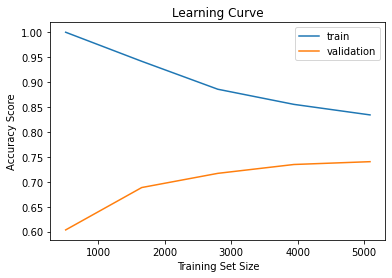

In [ ]:
from sklearn.model_selection import learning_curve
from matplotlib import pyplot as plt
import numpy as np
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model, x_train_scale, y_train, cv=5,scoring='accuracy', return_times=True)
plt.plot(train_sizes,np.mean(train_scores,axis=1), label="train")
plt.plot(train_sizes,np.mean(test_scores,axis=1), label="validation")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")

We can see from this plot that as the training size increase the accuracy of the train set  decrease which is good becuase if it was high it could indicate as overfitting.
In addition, we can see that the accuracy of the validation set increase as the training size increase as we wanted

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [ ]:
for score in ["accuracy", "balanced_accuracy","precision_micro", "recall_micro", "f1_micro","precision_macro", "recall_macro", "f1_macro","precision_weighted", "recall_weighted", "f1_weighted"]:
  scores = cross_val_score(model, x_train_scale, y_train, cv=5, scoring=score).mean()
  print(score, ": ", scores)

accuracy :  0.7399004234043289
balanced_accuracy :  0.5379911410354832
precision_micro :  0.7399004234043289
recall_micro :  0.7399004234043289
f1_micro :  0.7399004234043289
precision_macro :  0.8205357256105941
recall_macro :  0.5379911410354832
f1_macro :  0.5990883535317144
precision_weighted :  0.7562325386621707
recall_weighted :  0.7399004234043289
f1_weighted :  0.712250326705476


In [ ]:
# List of evaluation metrics
# Accuracy - 0.7399004234043289
# Balanced Accuracy - 0.5379911410354832
# Micro Precision - 0.7399004234043289
# Micro Recall - 0.7399004234043289
# Micro F1-score - 0.7399004234043289
# Macro Precision - 0.8205357256105941
# Macro Recall - 0.5379911410354832
# Macro F1-score - 0.5990883535317144
# Weighted Precision - 0.7562325386621707
# Weighted Recall - 0.7399004234043289
# Weighted F1-score - 0.712250326705476

Answer:

1. **Accuracy** is a measure of the proportion of correct predictions made by a machine learning model out of all the predictions it made.
- It is relevant to this prediction task becuase our goal is to make predictions that are as close as possible to the true values of the target variable.
- We think that the score we got is not very low but it could be better.
2. **Balanced accuracy** accounts for imbalanced class distribution in the data by calculating the average of the model's per-class accuracies.
- It is relevant to this prediction task becuase our data is imbalanced (we saw in the part of data analysis that class 2 is about a half of the training set).
- We think that the score we got is not good, it should be improved.
3. **Micro precision** calculates the precision of a model's predictions by treating all classes as a single class and summing the true positives, false positives, and false negatives across all classes. Often using for imbalance data.
- It is relevant to this prediction task becuase this measure is used when the target variable has a large number of observations belonging to one class, and only a small number of observations belonging to the other class, in our case class 2 has a large number of observations compared to the other classes.
- We think that the score we got is not very low but it could be better.
4. **Micro recall** calculates the recall of a model's predictions by treating all classes as a single class and summing the true positives, false negatives, and false negatives across all classes. Often using for imbalance data.
- It is relevant to this prediction task becuase the goal is to identify as many true labels in a dataset with a very imbalanced class distribution.
- We think that the score we got is not very low but it could be better.
5. **Micro F1-score** combines the micro precision and micro recall of a model's predictions by treating all classes as a single class and summing the true positives, false positives, and false negatives across all classes. It is calculated as the harmonic mean of micro precision and micro recall. Often using for imbalance data.
- It is relevant to this prediction task becuase micro precision and micro recall are relevant.
- We think that the score we got is not very low but it could be better.
6. **Macro precision** calculates the average precision of a model's predictions across all classes, treating each class as equally important. It is calculated by summing the per-class precisions and dividing by the number of classes. Often using for balance data.
- It is not relevant to this prediction task becuase our data is imbalance.
7. **Macro recall** calculates the average recall of a model's predictions across all classes, treating each class as equally important. It is calculated by summing the per-class recalls and dividing by the number of classes.Often using for balance data.
- It is not relevant to this prediction task becuase our data is imbalance.
8. **Macro F1-score** combines the macro precision and macro recall of a model's predictions across all classes, treating each class as equally important. It is calculated as the harmonic mean of macro precision and macro recall.
- It is not relevant to this prediction task becuase macro precision and macro recall are not relevant.
9. **Weighted precision** calculates the average precision of a model's predictions across all classes, weighting each class's precision by the number of true instances of that class. It can be used to give more importance to the precision of the more prevalent classes in the data.
- It is relevant to this prediction task becuase this measure can be useful when you have an imbalanced dataset, where one class is much more prevalent than the other, and you want to know how well the model is performing overall.
- The score we got is the highest score from all the others, which is good because our data is not sensitive and this is the reason we wanted to maximaize it.
10. **Weighted recall** calculates the average recall of a model's predictions across all classes, weighting each class's recall by the number of true instances of that class. It can be used to give more importance to the recall of the more prevalent classes in the data.
- It is not relevant to this prediction task becuase our predictions is not sensitive.
11. **Weighted F1-score** combines the weighted precision and weighted recall of a model's predictions across all classes, weighting each class's precision and recall by the number of true instances of that class. It is calculated as the harmonic mean of weighted precision and weighted recall, and can be used to give more importance to the precision and recall of the more prevalent classes in the data.
- It is not relevant to this prediction task becuase weighted recall are not relevant.


### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 25.8 MB/s 


In [ ]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train_scale)

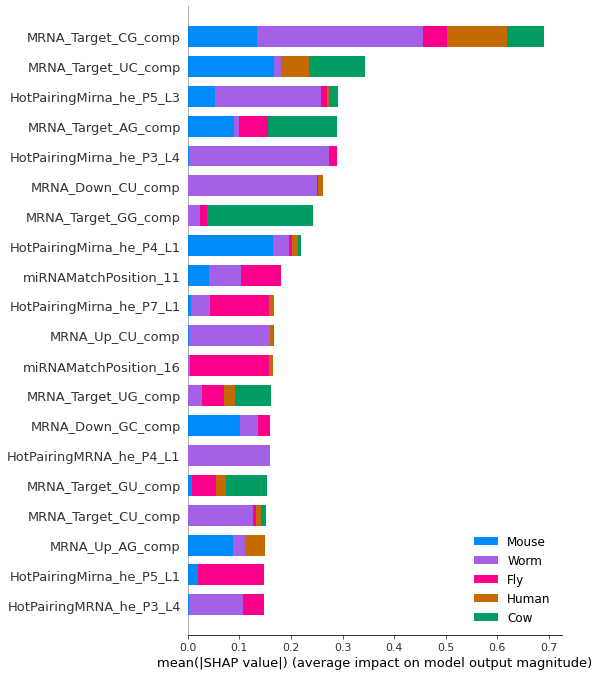

In [ ]:
shap.summary_plot(shap_values, x_train_scale, class_names=['Worm', 'Fly', 'Cow', 'Human', 'Mouse'])

**conclusions:**

We can see from the plot that:
1.   The first feature `MRNA_Target_CG_comp` is most important for the classification.
2.   The feature `HotPairingMRNA_he_P4_Ll` affected only on class that represation the animal worm.
3. It can be seen that The feature `HotPairingMirna_he_p4_Ll` affected all of the classes but it affected most of class that represent mouse.



### Competition rank (10 pts):
The competition will end on 29.12 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [ ]:
# My team name was: AT

python code:

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import cross_val_score

x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
sub = pd.read_csv('sub.csv')

def fill_null_value(df):
  for col in df.columns:
    most_commom = df[col].value_counts().head(1)
    if isinstance(most_commom.index[0], str):
      df[col].fillna(most_commom.index[0], inplace = True)
    elif isinstance(most_commom.index[0], bool):
      df[col].fillna(most_commom.index[0], inplace = True)
    elif (most_commom.values / len(df)) >= 0.6:
      df[col].fillna(most_commom.index[0], inplace = True)
    else:
      mean_value = df[col].mean()
      df[col].fillna(mean_value, inplace = True)
  return df

x_train = fill_null_value(x_train)
x_test = fill_null_value(x_test)

x_test = x_test.drop('id', axis=1)
x_train = x_train.drop('id', axis=1)
y_train = y_train.drop('id', axis=1)

cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(x_train, y_train)
x_train_cbe = cbe_encoder.transform(x_train)
x_test_cbe = cbe_encoder.transform(x_test)

scaler = StandardScaler()
x_train_scale = pd.DataFrame(scaler.fit_transform(x_train_cbe), columns=x_train_cbe.columns)
x_test_scale = pd.DataFrame(scaler.fit_transform(x_test_cbe), columns=x_test_cbe.columns)

x_train_scale['label'] = y_train['label']
x_train_scale = x_train_scale[x_train_scale['label'].notna()]

y_train = x_train_scale['label']
x_train_scale = x_train_scale.drop('label', axis=1)

dmatrix = xgb.DMatrix(data=x_train_scale, label=y_train)
params = {'objective': 'multi:softmax', 'eval_metric': 'merror'}
model = xgb.XGBClassifier(**params)
model.fit(x_train_scale, y_train)
pred_class = model.predict(x_test_scale)

sub['label'] = pred_class.astype(int)
sub.to_csv('/submission.csv', sep=',', index=False)